In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 26.4 MB/s 
     |████████████████████████████████| 9.9 MB 28.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=66f32bfa941e9eda4783df48f7f860e089e24a174c05f30bb1afdd739e19e60f
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b356448816acaf11080f8e4d8d30888d57d046a381364c59898a7f066ccf85c0
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib as plt
import scipy
iris = load_iris()
iris_pd=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
import pingouin as pg
from matplotlib.pyplot import figure
import seaborn as sns

1.	Провести визуализация данных в трехмерном пространстве (3D Plot). Для выборки «Iris» обосновать выбор трех измерений (сделать дополнительные исследования, например карта корреляций). Сравнить трехмерные диаграммы для выборок и сделать предварительные выводы (Исходное количество кластеров считаем неизвестным).  В отчёт включить обоснование выбора измерений (результаты исследований и вывод по ним) и графики.

In [ ]:
target = iris_pd['target']

In [ ]:
data = iris_pd.drop(columns=['target'])

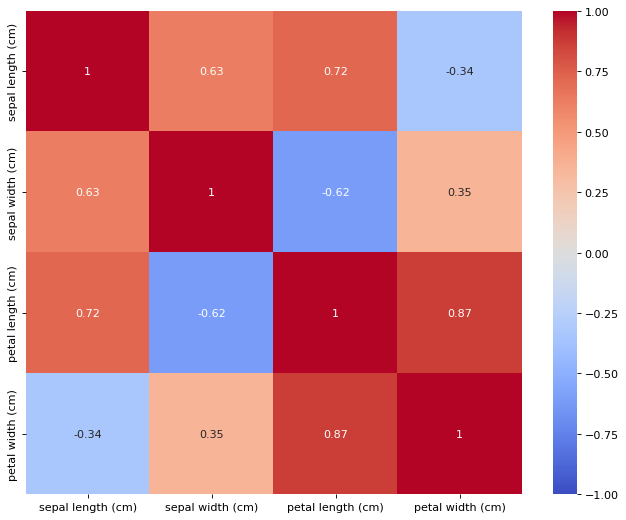

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
sns.heatmap(data.pcorr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Выбираем все переменные, кроме sepal width (cm), т.к карта корреляций этот признак выделяет наименее значимым

In [ ]:
data.columns

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'target'], dtype='object')

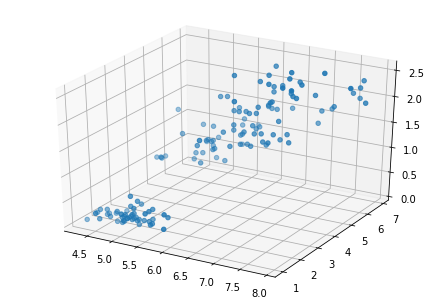

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z')
plt.show()

In [ ]:
data = iris_pd.drop(columns=['sepal width (cm)'])
data = data.drop(columns=['target'])


In [ ]:
data = iris_pd.drop(columns=['sepal width (cm)'])

Отчётливо видно разделение на два кластера

2. Провести иерархическую кластеризацию. Исследовать зависимость результатов иерархической классификации от выбора меры близости (евклидово расстояние, манхэттенское расстояние, расстояние Чебышева, косинусное) и правила объединения кластеров (одиночная связь, полная связь, невзвешенная средняя связь, невзвешенная центроидная связь, метод Уорда). Проанализировать диаграмму изменения расстояний при объединении кластеров. Оценить предположительное число кластеров, на которое разделяется исследуемая совокупность. В отчёт включить наилучшие результаты и обосновать почему они наилучшие (сравнить с плохим/средним результатом). Так же включить обоснование предположительного числа кластеров.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

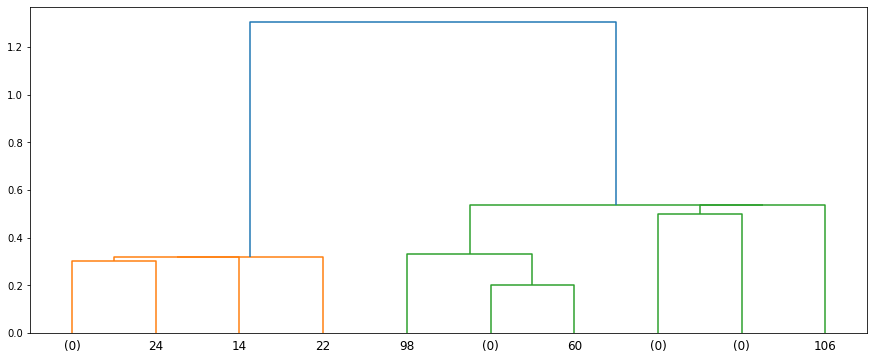

In [ ]:
model = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='single', compute_distances=True)
model.fit(data)
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

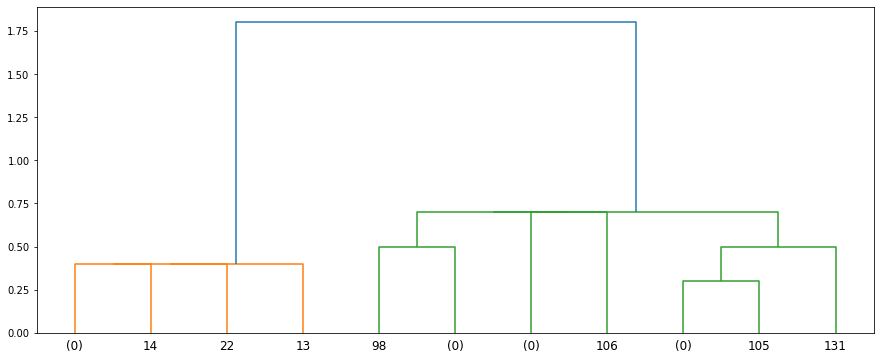

In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single', compute_distances=True)
model.fit(data)
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

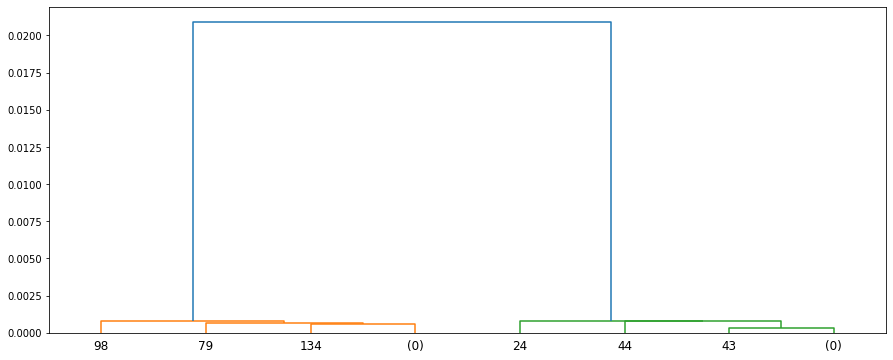

In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single', compute_distances=True)
model.fit(data)
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

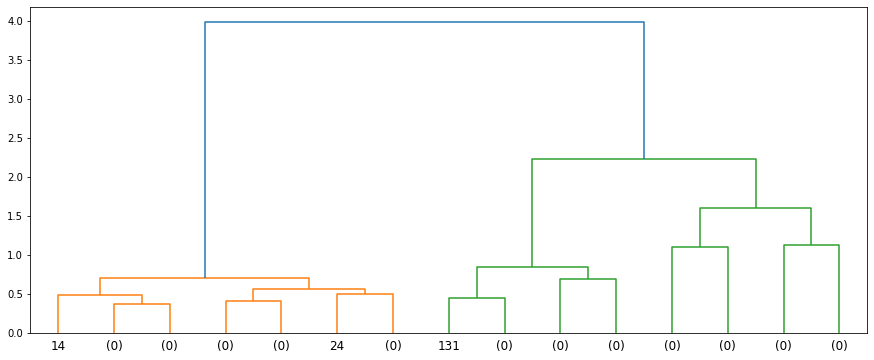

In [ ]:
model = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='average', compute_distances=True)
model.fit(data)
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

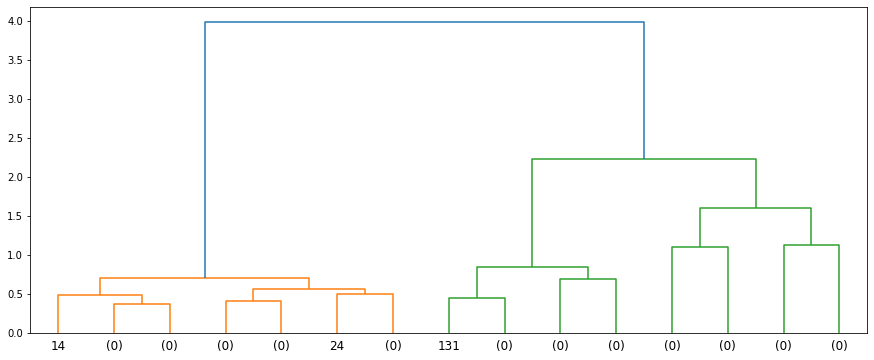

In [ ]:
model = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='average', compute_distances=True)
model.fit(data)
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

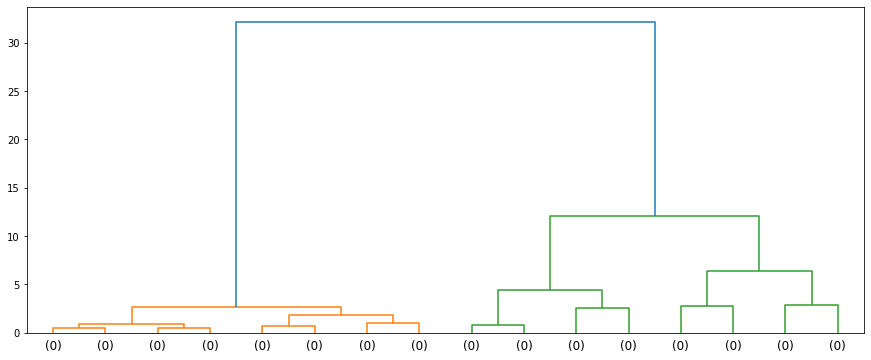

In [ ]:
model = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward', compute_distances=True)
model.fit(data)
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

Построить проекцию исследуемой совокупности многомерных наблюдений на плоскость с помощью метода главных компонент (PCA). Оценить предположительное число кластеров, на которое разделяется исследуемая совокупность. Проанализировать количество выделенных компонент и точность метода. Проанализировать взаимосвязь между полученными главными компонентами и исходными признаками. В отчёт включить результаты и обоснование предположительного числа кластеров.


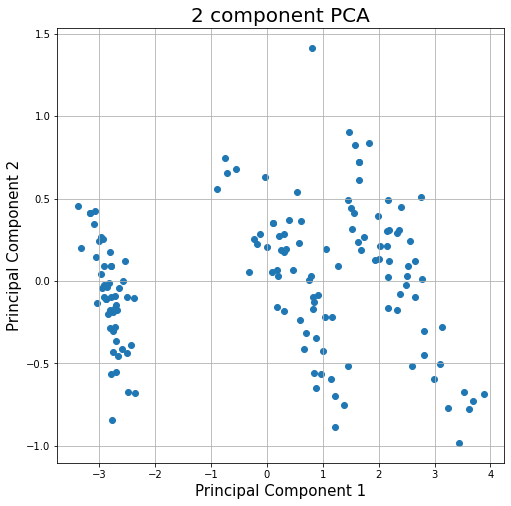

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
ax.grid()

три

Построить проекцию исследуемой совокупности многомерных наблюдений на плоскость с помощью стохастического вложения соседей с t-распределением (t-sne). Оценить предположительное число кластеров, на которое разделяется исследуемая совокупность. Сравнить полученные результаты с результатами предыдущего пункта. В отчёт включить результаты и обоснование предположительного числа кластеров.


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


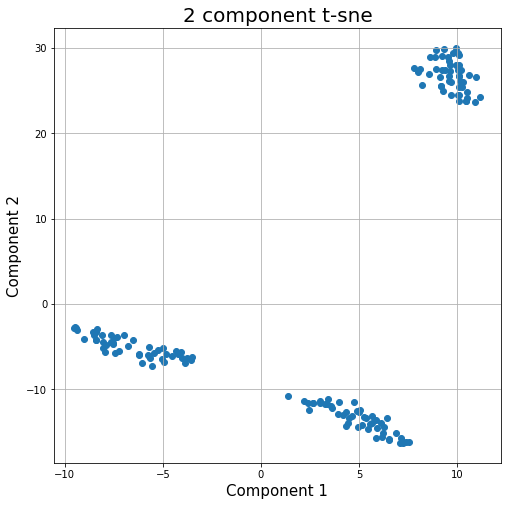

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_Components = tsne.fit_transform(data)
tsne_Df = pd.DataFrame(data = tsne_Components
             , columns = ['Component 1', 'Component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component t-sne', fontsize = 20)
colors = ['r', 'g', 'b']
ax.scatter(tsne_Df['Component 1'], tsne_Df['Component 2'])
ax.grid()

На основе проведенных исследований сформулировать и обосновать предположение о числе кластеров. (Сделать общий вывод с примерами)

Вывод:

Провести неиерархическую кластеризацию с помощью центроидного метода k-средних и проверить выдвинутое предположение о числе кластеров (для этого требуется посмотреть большее и меньшее количество кластеров).



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z')
plt.show()

In [ ]:
data =

,sepal length (cm),petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,0.0
1,4.9,1.4,0.2,0.0
2,4.7,1.3,0.2,0.0
3,4.6,1.5,0.2,0.0
4,5.0,1.4,0.2,0.0
...,...,...,...,...
145,6.7,5.2,2.3,2.0
146,6.3,5.0,1.9,2.0
147,6.5,5.2,2.0,2.0
148,6.2,5.4,2.3,2.0


In [ ]:
data = iris_pd.drop(columns=['sepal width (cm)'])
data = data.drop(columns=['target'])

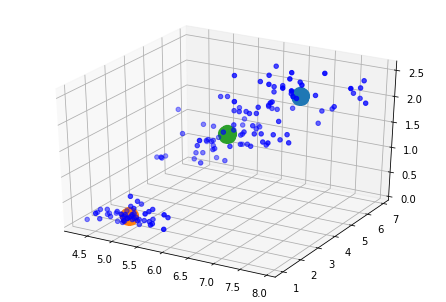

"\nfor i in np.unique(model.labels_):\n    _ = ax.scatter([model.labels_ == i, 1],  [model.labels_ == i, 2], \n                 data[model.labels_ == i, 1], '.', color=colors[i])\n    _ = plt.plot([model.cluster_centers_[i][0]], \n                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)"

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(data)

fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z', c = 'blue')
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], model.cluster_centers_[i][2], marker = '*', linewidths = 15)
plt.show()

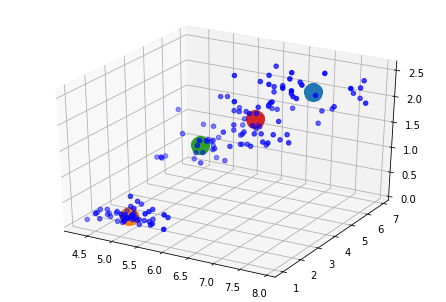

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data)

fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z', c = 'blue')
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], model.cluster_centers_[i][2], marker = '*', linewidths = 15)
plt.show()

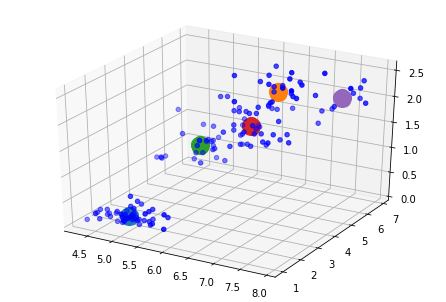

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(data)

fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z', c = 'blue')
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], model.cluster_centers_[i][2], marker = '*', linewidths = 15)
plt.show()

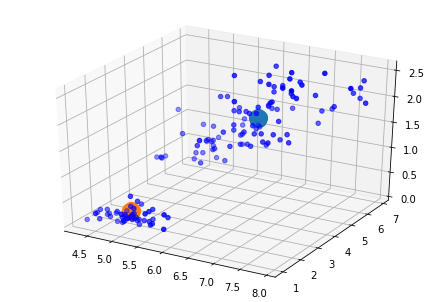

In [ ]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(data)

fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z', c = 'blue')
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], model.cluster_centers_[i][2], marker = '*', linewidths = 15)
plt.show()

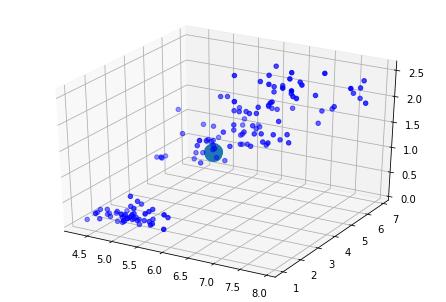

In [ ]:
model = KMeans(n_clusters=1, random_state=42)
model.fit(data)

fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']
# put 0s on the y-axis, and put the y axis on the z-axis
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z', c = 'blue')
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], model.cluster_centers_[i][2], marker = '*', linewidths = 15)
plt.show()

Провести визуализация данных в трехмерном пространстве (3D Plot) (как в пп. 1). При отображении указать принадлежность наблюдения к кластеру (раскрасить точки на графике в соответствии с принадлежностью к кластеру): 

Исходного распределения
Распределения полученного в пп. 6
Сравнить полученные графики. (В отчёт включить оба графики и вывод по полученным результатам)


In [ ]:
data = iris_pd.drop(columns=['sepal width (cm)'])

In [ ]:
data

,sepal length (cm),petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,0.0
1,4.9,1.4,0.2,0.0
2,4.7,1.3,0.2,0.0
3,4.6,1.5,0.2,0.0
4,5.0,1.4,0.2,0.0
...,...,...,...,...
145,6.7,5.2,2.3,2.0
146,6.3,5.0,1.9,2.0
147,6.5,5.2,2.0,2.0
148,6.2,5.4,2.3,2.0


In [ ]:
data['target'][0]

0.0

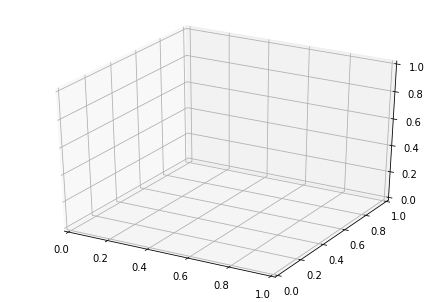

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

x = data['sepal length (cm)']
y = data['petal length (cm)']
z = data['petal width (cm)']

for i in range(len(data)):
    if data['target'][i] == '0':
        ax.scatter(data['sepal length (cm)'][i], data['petal length (cm)'][i], data['petal width (cm)'][i], c = 'blue')
    elif data['target'][i] == '1':
        ax.scatter(data['sepal length (cm)'][i], data['petal length (cm)'][i], data['petal width (cm)'][i], c = 'red')
    elif data['target'][i] == '2':
        ax.scatter(data['sepal length (cm)'][i], data['petal length (cm)'][i], data['petal width (cm)'][i], c = 'green')
    
# put 0s on the y-axis, and put the y axis on the z-axis
#ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z', c = 'blue')